## Esercizio 12.1

L' obbiettivo di questa esercitazine è quello di utilizzare modelli di deep neural network per riconoscere le 10 cifre scritte a mano.

Per creare i dati di training e di validation basta importare il modulo mnist e caricareli con la funzione load_data(), una volta caricare sarà necessario formattarli.

La griglia pixel sarà $28\times 28$ ognuno dei quali ha 256 gradazioni di grigio.

In [1]:
import os
os.environ['KMP_DUPLICATE_LIB_OK'] ='True'

import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

seed=0
np.random.seed(seed) # fix random seed
tf.random.set_seed(seed)

# setto la dimensione dell'immagine
img_rows, img_cols = 28, 28 
# output numero di cifre
num_classes = 10 

# carico i dati di training e di validation
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28)
Y_train shape: (60000,)

60000 train samples
10000 test samples


Caricati i dati li formatto 

an example of a data point with label 4


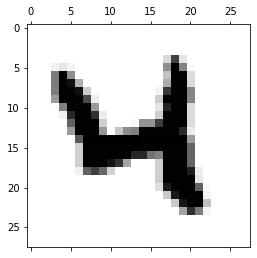

an example of a data point with label 4 before to_categorical ...
... and with label [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] after to_categorical

X_train shape: (60000, 784)
Y_train shape: (60000, 10)


In [2]:
# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)

# cast floats to single precision
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

# look at an example of data point
print('an example of a data point with label', Y_train[20])
# matshow: display a matrix in a new figure window
plt.matshow(X_train[20,:].reshape(28,28),cmap='binary')
plt.show()

print('an example of a data point with label', Y_train[20], 'before to_categorical ...')
# convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)
print('... and with label', Y_train[20], 'after to_categorical')
print()
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)

Adesso posso creare la rete neurale e mantenendoo fissi i parametri la compilo utilizzando tre ottimizzatori diversi per vedere come varia la perfomance della rete:
1. SGD
2. Adadelta
3. RMSprop

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 16s 265us/sample - loss: 0.6613 - acc: 0.8082 - val_loss: 0.2765 - val_acc: 0.9236
Epoch 2/10
60000/60000 [==============================] - 18s 293us/sample - loss: 0.3392 - acc: 0.9029 - val_loss: 0.2111 - val_acc: 0.9391
Epoch 3/10
60000/60000 [==============================] - 17s 277us/sample - loss: 0.2743 - acc: 0.9232 - val_loss: 0.1767 - val_acc: 0.9479
Epoch 4/10
60000/60000 [==============================] - 15s 252us/sample - loss: 0.2306 - acc: 0.9344 - val_loss: 0.1526 - val_acc: 0.9527
Epoch 5/10
60000/60000 [==============================] - 23s 376us/sample - loss: 0.2018 - acc: 0.9429 - val_loss: 0.1374 - val_acc: 0.9564
Epoch 6/10
60000/60000 [==============================] - 20s 335us/sample - loss: 0.1826 - acc: 0.9491 - val_loss: 0.1251 - val_acc: 0.9587
Epoch 7/10
60000/60000 [==============================] - 18s 297us/sample - loss: 0.1631 - acc: 0.9536 


Test loss: 0.09626485609617084
Test accuracy: 0.9688


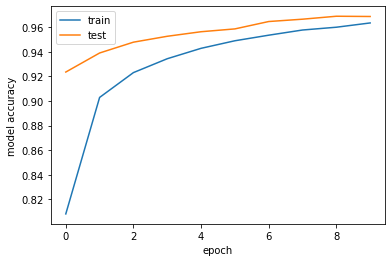

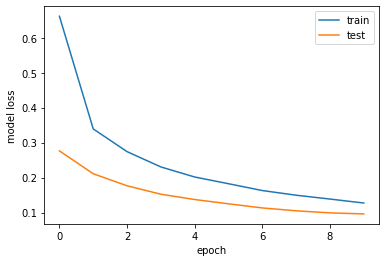

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects


##SGD
model1 = Sequential()
model1.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
model1.add(Dense(100, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(num_classes, activation='softmax'))

model1.compile(optimizer='sgd', loss=keras.losses.categorical_crossentropy, metrics=['acc'])
#altri ottimizzatori: SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam


history1 = model1.fit(X_train, Y_train,
          batch_size=25,
          epochs=10,
          verbose=1,
          validation_data=(X_test, Y_test))

# evaluate model
score = model1.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
plt.plot(history1.history['acc'])
plt.plot(history1.history['val_acc'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 47s 783us/sample - loss: 2.2926 - acc: 0.1475 - val_loss: 2.1355 - val_acc: 0.3378
Epoch 2/10
60000/60000 [==============================] - 42s 699us/sample - loss: 2.0926 - acc: 0.2893 - val_loss: 1.9429 - val_acc: 0.5402
Epoch 3/10
60000/60000 [==============================] - 49s 815us/sample - loss: 1.9172 - acc: 0.4108 - val_loss: 1.7596 - val_acc: 0.6547
Epoch 4/10
60000/60000 [==============================] - 46s 759us/sample - loss: 1.7585 - acc: 0.4956 - val_loss: 1.5874 - val_acc: 0.7109
Epoch 5/10
60000/60000 [==============================] - 50s 833us/sample - loss: 1.6135 - acc: 0.5509 - val_loss: 1.4315 - val_acc: 0.7474
Epoch 6/10
60000/60000 [==============================] - 48s 796us/sample - loss: 1.4884 - acc: 0.5903 - val_loss: 1.2960 - val_acc: 0.7732
Epoch 7/10
60000/60000 [==============================] - 43s 713us/sample - loss: 1.3793 - acc: 0.6211 


Test loss: 0.9216328811645508
Test accuracy: 0.8244


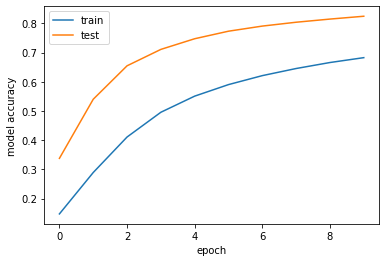

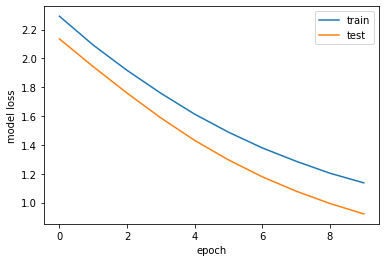

In [4]:
##Adadelta
model1 = Sequential()
model1.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
model1.add(Dense(100, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(num_classes, activation='softmax'))

model1.compile(optimizer='Adadelta', loss=keras.losses.categorical_crossentropy, metrics=['acc'])
#altri ottimizzatori: SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam


history1 = model1.fit(X_train, Y_train,
          batch_size=25,
          epochs=10,
          verbose=1,
          validation_data=(X_test, Y_test))

# evaluate model
score = model1.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
plt.plot(history1.history['acc'])
plt.plot(history1.history['val_acc'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 34s 564us/sample - loss: 0.2785 - acc: 0.9212 - val_loss: 0.1313 - val_acc: 0.9623
Epoch 2/10
60000/60000 [==============================] - 40s 661us/sample - loss: 0.1671 - acc: 0.9611 - val_loss: 0.1341 - val_acc: 0.9728
Epoch 3/10
60000/60000 [==============================] - 33s 543us/sample - loss: 0.1665 - acc: 0.9665 - val_loss: 0.1257 - val_acc: 0.9755
Epoch 4/10
60000/60000 [==============================] - 36s 592us/sample - loss: 0.1734 - acc: 0.9671 - val_loss: 0.1633 - val_acc: 0.9718
Epoch 5/10
60000/60000 [==============================] - 30s 497us/sample - loss: 0.1730 - acc: 0.9698 - val_loss: 0.1969 - val_acc: 0.9702
Epoch 6/10
60000/60000 [==============================] - 32s 526us/sample - loss: 0.1863 - acc: 0.9685 - val_loss: 0.2169 - val_acc: 0.9761
Epoch 7/10
60000/60000 [==============================] - 30s 497us/sample - loss: 0.1950 - acc: 0.9679 


Test loss: 0.25275180907569983
Test accuracy: 0.9738


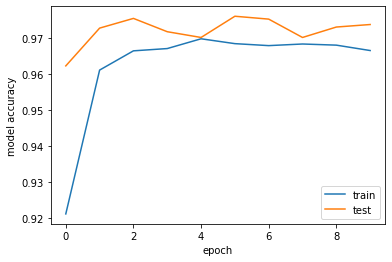

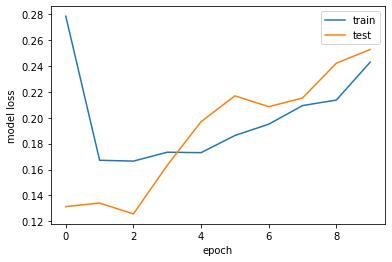

In [6]:
##RMSdrop
model1 = Sequential()
model1.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
model1.add(Dense(100, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(num_classes, activation='softmax'))

model1.compile(optimizer='RMSprop', loss=keras.losses.categorical_crossentropy, metrics=['acc'])
#altri ottimizzatori: SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam


history1 = model1.fit(X_train, Y_train,
          batch_size=25,
          epochs=10,
          verbose=1,
          validation_data=(X_test, Y_test))

# evaluate model
score = model1.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
plt.plot(history1.history['acc'])
plt.plot(history1.history['val_acc'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

Dai grafici di perdita e accuratezza si vede come l' ottimizzatore SGD siamo il migliore avendo accuratezza maggiore e perdita minore. Da qui in poi quindi utilizzerò questo ottimizzatore.

## Esercizio 11.2

Per sfruttare la correlazione spaziale e l'invarianza traslazionale che i pixel hanno nelle immagini, implemento una rete costituita da hidden layer convoluzionali 2D che filtrano i dati in input per ottenere utili informazioni e da pooling layer che rimpiccioliscono la dimensione dell' immagine. 

Per utilizzare questo tipo di rete è necessario cambiare la forma ai dati e non utilizzare più un vettore di pixel $28 \times 28$ 1D ma bidimensionale.

In [9]:
#cambio forma ai dati 

# you will need the following for Convolutional Neural Networks
from tensorflow.keras.layers import Flatten, Conv2D, MaxPooling2D

# reshape data, depending on Keras backend
if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28, 1)
Y_train shape: (60000, 10)

60000 train samples
10000 test samples


Ora creo la rete neurale,la compilo e la alleno. Utilizzo un alternanza di strati convoluzionali e di pooling.

In [10]:
#CREAZIONE DELLA RETE CONVOLUZIONALE E COMPILAZIONE

model = Sequential()
    # add first convolutional layer with 10 filters (dimensionality of output space)
model.add(Conv2D(10, kernel_size=(5, 5), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(16, kernel_size=(5, 5)))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Flatten())
model.add(Dense(256))
model.add(Dropout(0.5))
model.add(Dense(100, activation="relu"))
model.add(Dense(10, activation='softmax'))


    
model.compile(loss=keras.losses.categorical_crossentropy, optimizer='sgd', metrics=['acc'])

history=model.fit(X_train, Y_train,
          batch_size=25,
          epochs=10,
          verbose=1,
          validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 81s 1ms/sample - loss: 0.4457 - acc: 0.8588 - val_loss: 0.1165 - val_acc: 0.9610
Epoch 2/10
60000/60000 [==============================] - 75s 1ms/sample - loss: 0.1463 - acc: 0.9541 - val_loss: 0.0772 - val_acc: 0.9735
Epoch 3/10
60000/60000 [==============================] - 75s 1ms/sample - loss: 0.1096 - acc: 0.9672 - val_loss: 0.0644 - val_acc: 0.9781
Epoch 4/10
60000/60000 [==============================] - 74s 1ms/sample - loss: 0.0906 - acc: 0.9723 - val_loss: 0.0546 - val_acc: 0.9821
Epoch 5/10
60000/60000 [==============================] - 75s 1ms/sample - loss: 0.0788 - acc: 0.9756 - val_loss: 0.0488 - val_acc: 0.9841
Epoch 6/10
60000/60000 [==============================] - 74s 1ms/sample - loss: 0.0718 - acc: 0.9780 - val_loss: 0.0426 - val_acc: 0.9869
Epoch 7/10
60000/60000 [==============================] - 72s 1ms/sample - loss: 0.0642 - acc: 0.9806 - val_loss: 0.

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================


Test loss: 0.03477457791314228
Test accuracy: 0.9886


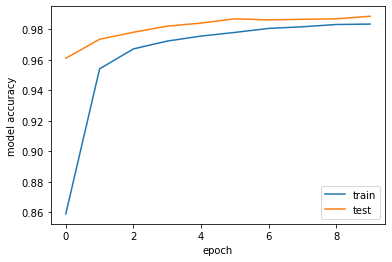

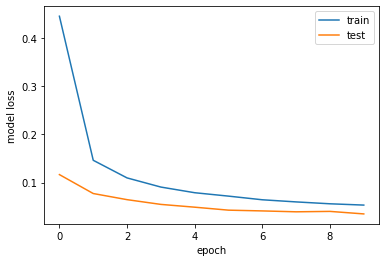

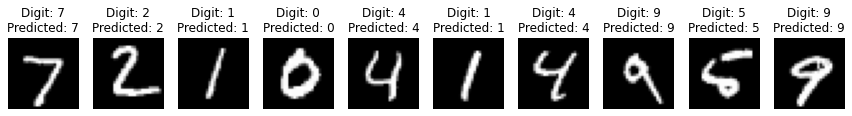

In [16]:

# evaluate model
score = model.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])



# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()



predictions = model.predict(X_test)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted: {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

## Esercizio 12.3

Testando la rete sulle cifre scritte a mano, questa riesce a distinguerle tutte. Riporto un esempio qua sotto utilizzando la cifra 3.

image size:  (28, 28)
Digit predicted:    3


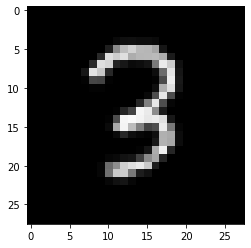

In [22]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread('cifre/3.png')



def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

gray=rgb2gray(img)
print("image size: ",gray.shape)

gray = gray.reshape(1,28,28,1)
pred = model.predict(gray)

print("Digit predicted:    {}".format(np.argmax(pred)))
imgplot = plt.imshow(img)
plt.show()